In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [20]:
#selected subset of dates. 
val_dates = ['180328','180329']
test_dates = ['180330','180331']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=128, CH = CH)

In [21]:
len(train_loader), len(val_loader), len(test_loader)

(446, 21, 49)

In [22]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180413, rec:002, time:4861.0


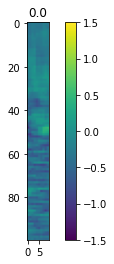

date:180401, rec:003, time:120.0


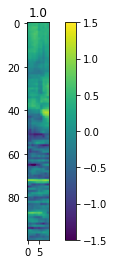

date:180327, rec:001, time:7022.0


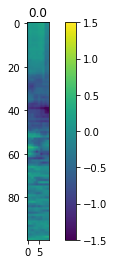

date:180414, rec:007, time:486.0


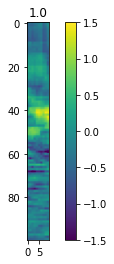

date:180414, rec:004, time:1790.0


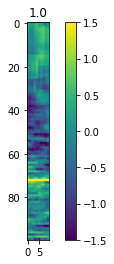

date:180327, rec:008, time:470.0


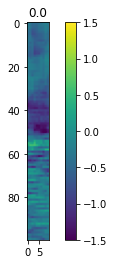

date:180413, rec:002, time:5501.0


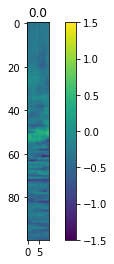

date:180413, rec:001, time:910.0


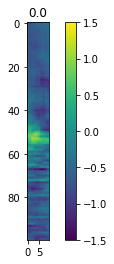

date:180414, rec:002, time:4661.0


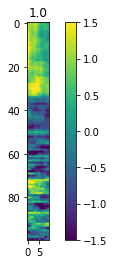

date:180409, rec:006, time:6328.0


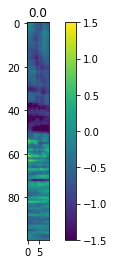

date:180413, rec:001, time:2550.0


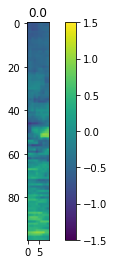

date:180413, rec:001, time:2290.0


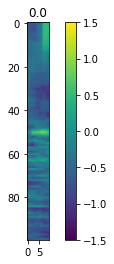

date:180411, rec:005, time:4679.0


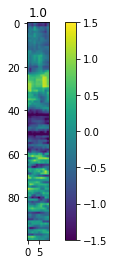

date:180324, rec:004, time:4729.0


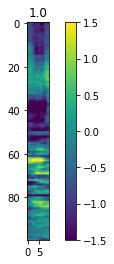

date:180412, rec:005, time:2790.0


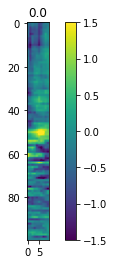

date:180411, rec:005, time:1370.0


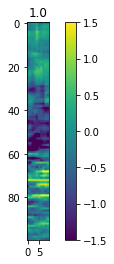

date:180325, rec:009, time:4849.0


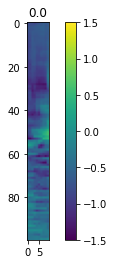

date:180413, rec:001, time:6337.0


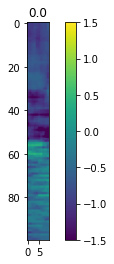

date:180413, rec:001, time:2750.0


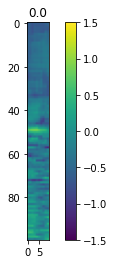

date:180413, rec:003, time:6121.0


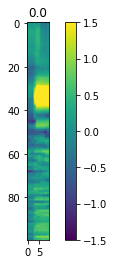

date:180410, rec:002, time:270.0


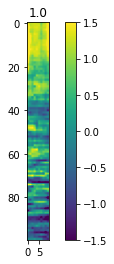

date:180327, rec:004, time:5713.0


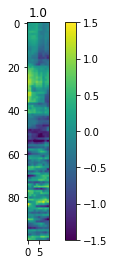

date:180413, rec:007, time:3902.0


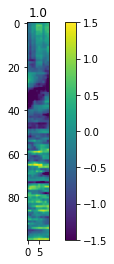

date:180414, rec:002, time:3951.0


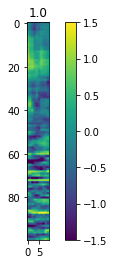

date:180323, rec:001, time:1170.0


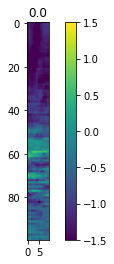

date:180324, rec:003, time:3647.0


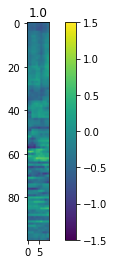

date:180322, rec:005, time:7149.0


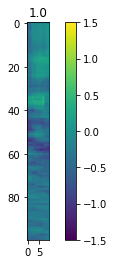

date:180327, rec:005, time:6482.0


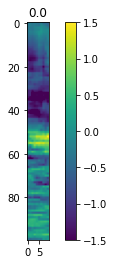

date:180409, rec:006, time:7058.0


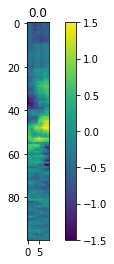

date:180327, rec:007, time:3270.0


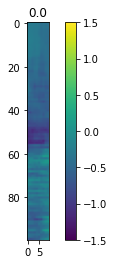

date:180325, rec:007, time:3548.0


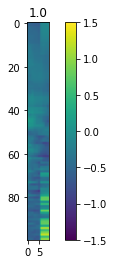

date:180327, rec:007, time:1560.0


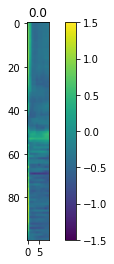

date:180327, rec:002, time:3911.0


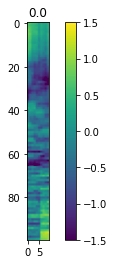

date:180414, rec:007, time:6318.0


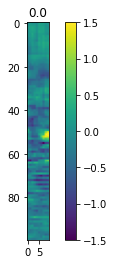

date:180401, rec:001, time:180.0


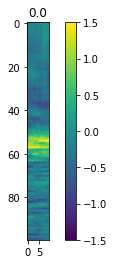

date:180411, rec:005, time:6499.0


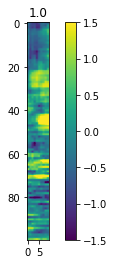

date:180401, rec:001, time:1210.0


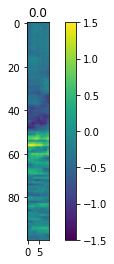

date:180323, rec:005, time:2827.0


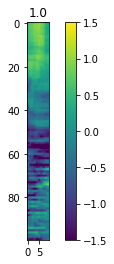

date:180413, rec:003, time:720.0


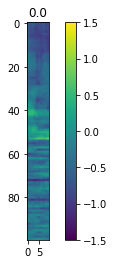

date:180322, rec:003, time:3768.0


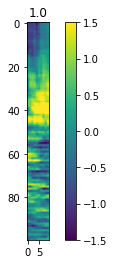

date:180414, rec:003, time:4809.0


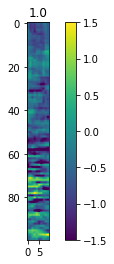

date:180325, rec:003, time:802.0


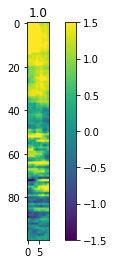

date:180413, rec:004, time:2984.0


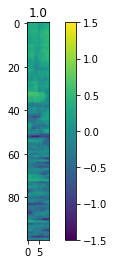

date:180413, rec:004, time:2764.0


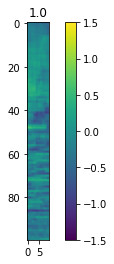

date:180324, rec:009, time:850.0


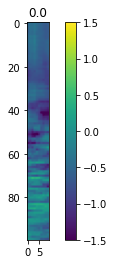

date:180413, rec:003, time:800.0


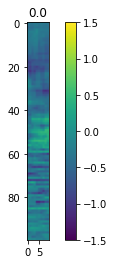

date:180327, rec:008, time:3952.0


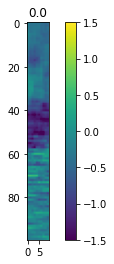

date:180414, rec:001, time:3934.0


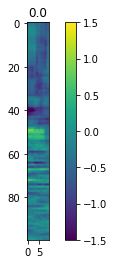

date:180322, rec:003, time:5233.0


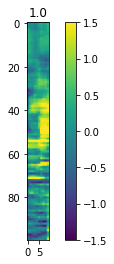

date:180410, rec:002, time:5242.0


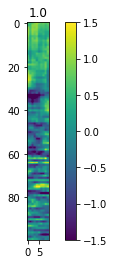

date:180414, rec:007, time:3417.0


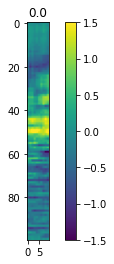

date:180401, rec:001, time:4787.0


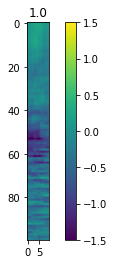

date:180411, rec:007, time:1698.0


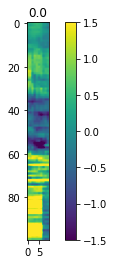

date:180323, rec:007, time:7171.0


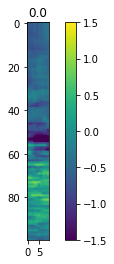

date:180414, rec:007, time:5468.0


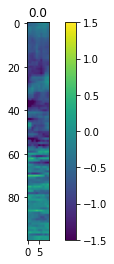

date:180323, rec:007, time:2785.0


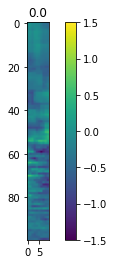

date:180411, rec:006, time:1131.0


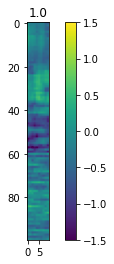

date:180324, rec:009, time:160.0


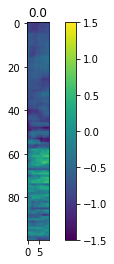

date:180413, rec:003, time:290.0


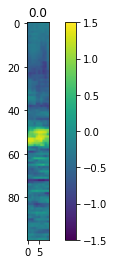

date:180325, rec:001, time:880.0


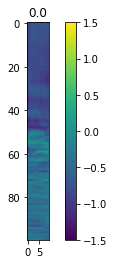

date:180323, rec:007, time:1999.0


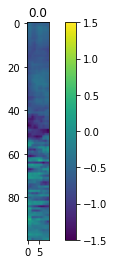

date:180323, rec:001, time:850.0


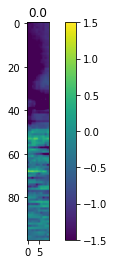

date:180412, rec:001, time:5168.0


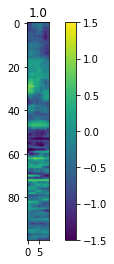

date:180413, rec:007, time:4576.0


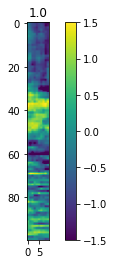

date:180410, rec:006, time:5822.0


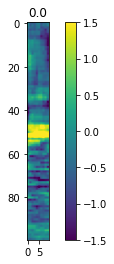

date:180325, rec:007, time:1224.0


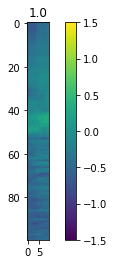

date:180325, rec:007, time:6553.0


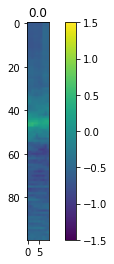

date:180325, rec:003, time:1985.0


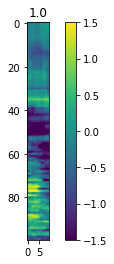

date:180327, rec:001, time:5434.0


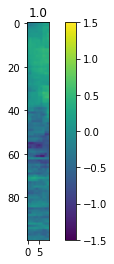

date:180322, rec:007, time:4560.0


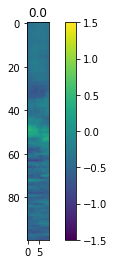

date:180413, rec:002, time:4291.0


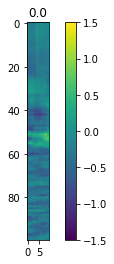

date:180414, rec:001, time:2489.0


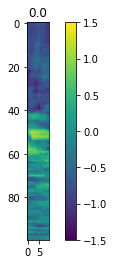

date:180412, rec:003, time:4086.0


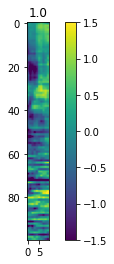

date:180325, rec:003, time:3632.0


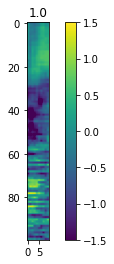

date:180322, rec:007, time:5070.0


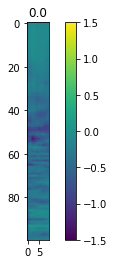

date:180413, rec:003, time:5078.0


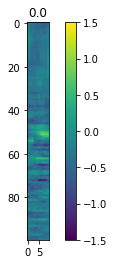

date:180323, rec:007, time:4672.0


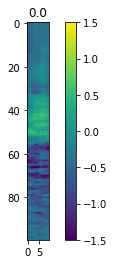

date:180327, rec:001, time:7022.0


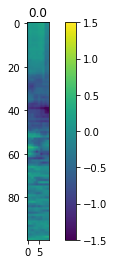

date:180325, rec:004, time:6067.0


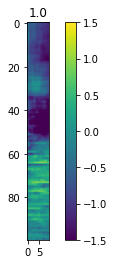

date:180325, rec:009, time:2656.0


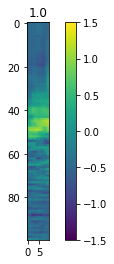

date:180414, rec:004, time:2050.0


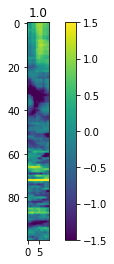

date:180323, rec:006, time:1676.0


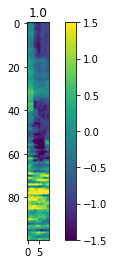

date:180409, rec:006, time:3215.0


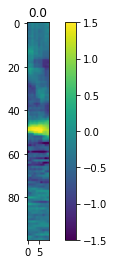

date:180413, rec:002, time:910.0


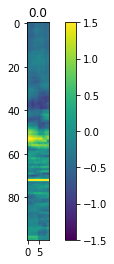

date:180414, rec:001, time:130.0


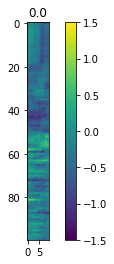

date:180413, rec:003, time:5008.0


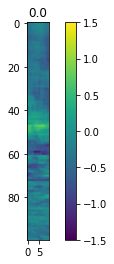

date:180413, rec:003, time:1783.0


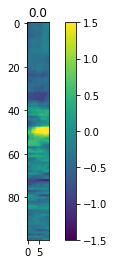

date:180413, rec:003, time:4758.0


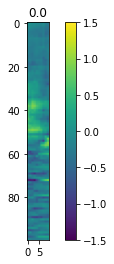

date:180324, rec:009, time:1298.0


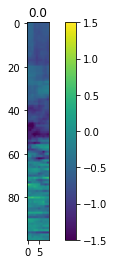

date:180412, rec:006, time:3718.0


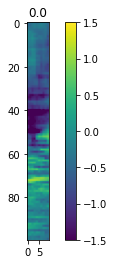

date:180323, rec:001, time:30.0


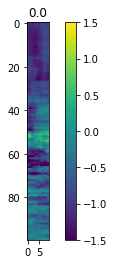

date:180322, rec:005, time:6724.0


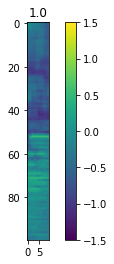

date:180413, rec:003, time:5871.0


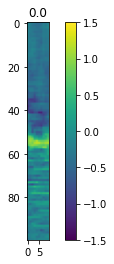

date:180414, rec:001, time:1730.0


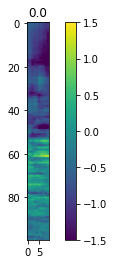

date:180414, rec:004, time:7151.0


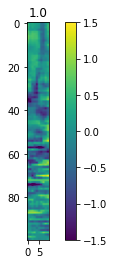

date:180411, rec:006, time:6804.0


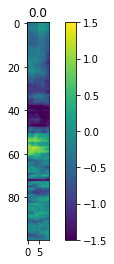

date:180414, rec:001, time:6123.0


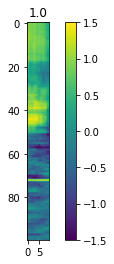

date:180327, rec:007, time:4941.0


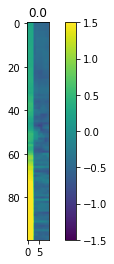

date:180410, rec:006, time:3464.0


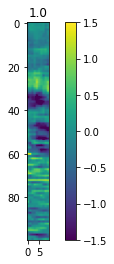

date:180410, rec:005, time:3024.0


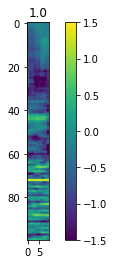

date:180327, rec:001, time:3362.0


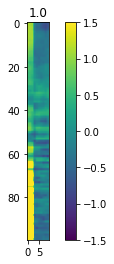

date:180411, rec:006, time:5086.0


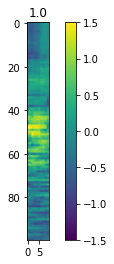

date:180327, rec:005, time:5289.0


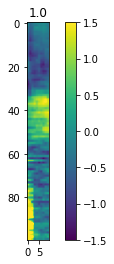

date:180322, rec:007, time:1637.0


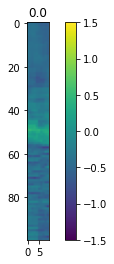

date:180323, rec:005, time:4228.0


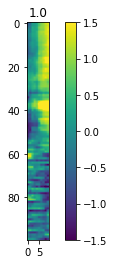

date:180325, rec:004, time:3100.0


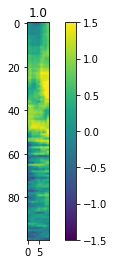

date:180324, rec:008, time:6754.0


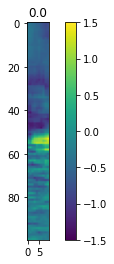

date:180326, rec:004, time:3998.0


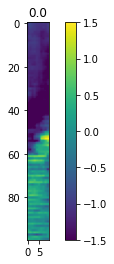

date:180327, rec:007, time:7131.0


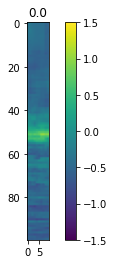

date:180322, rec:007, time:1387.0


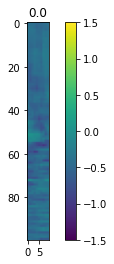

date:180413, rec:007, time:4122.0


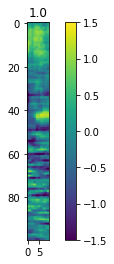

date:180322, rec:004, time:6676.0


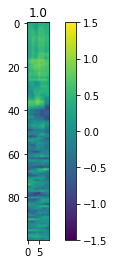

date:180327, rec:006, time:1190.0


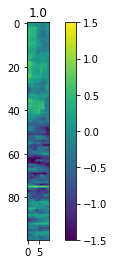

date:180413, rec:001, time:6987.0


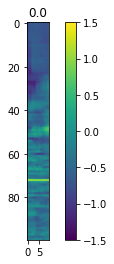

date:180327, rec:001, time:3504.0


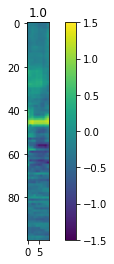

date:180327, rec:007, time:3710.0


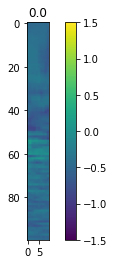

date:180414, rec:004, time:4265.0


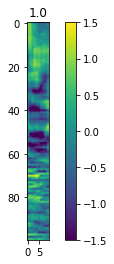

date:180413, rec:004, time:4246.0


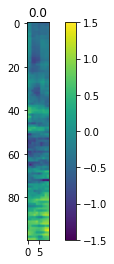

date:180412, rec:005, time:1217.0


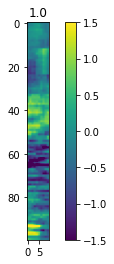

date:180412, rec:006, time:1222.0


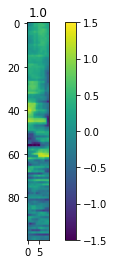

date:180327, rec:007, time:1920.0


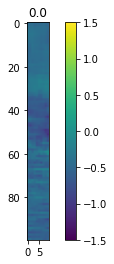

date:180325, rec:005, time:4206.0


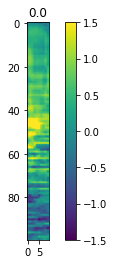

date:180413, rec:003, time:6701.0


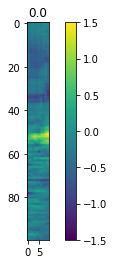

date:180412, rec:002, time:6961.0


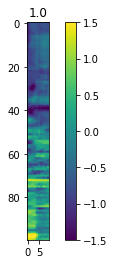

date:180409, rec:006, time:2119.0


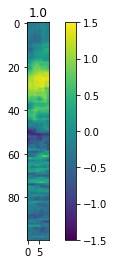

date:180413, rec:001, time:1130.0


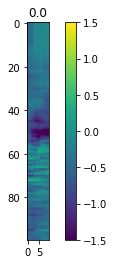

date:180412, rec:001, time:2710.0


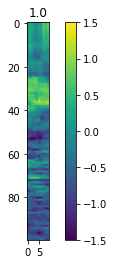

date:180410, rec:002, time:4931.0


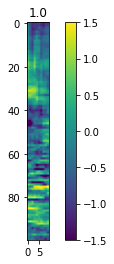

In [23]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

### Logistic regression with L2 regularization

In [24]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_10s_alldata_upsample'


model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.4781574010848999
Val loss for epoch 0: 0.49050968885421753
Train loss for epoch 1: 0.47466734051704407
Val loss for epoch 1: 0.5032944679260254
Train loss for epoch 2: 0.4729163646697998
Val loss for epoch 2: 0.5383385419845581
Train loss for epoch 3: 0.47363507747650146
Val loss for epoch 3: 0.49315428733825684
Train loss for epoch 4: 0.47254419326782227
Val loss for epoch 4: 0.5329561829566956
Train loss for epoch 5: 0.4713636338710785
Val loss for epoch 5: 0.49042558670043945
5
Train loss for epoch 6: 0.4714871346950531
Val loss for epoch 6: 0.4952324330806732
Train loss for epoch 7: 0.47058188915252686
Val loss for epoch 7: 0.5075283646583557
Train loss for epoch 8: 0.4701242446899414
Val loss for epoch 8: 0.48401549458503723
8
Train loss for epoch 9: 0.4692964255809784
Val loss for epoch 9: 0.4663481116294861
9
Train loss for epoch 10: 0.46908965706825256
Val loss for epoch 10: 0.5176140069961548
Train loss for epoch 11: 0.4681183397769928
Val loss for ep

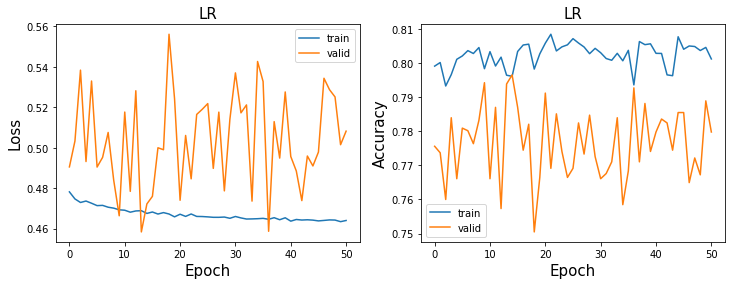

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

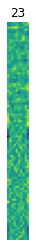

In [28]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [29]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.5611425638198853 accuracy:0.7386781885101616


In [30]:
np.mean(np.concatenate(test_labels))

0.7385182

In [31]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

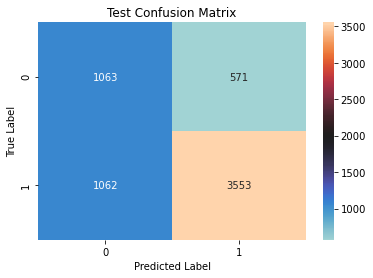

In [32]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:005, time:4747.0, label:1.0
Original data 62 CH


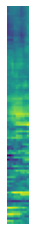

In [34]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with no regularization

In [35]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_10s_alldata_upsample'


model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [36]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5001843571662903
Val loss for epoch 0: 0.5648558139801025
Train loss for epoch 1: 0.4829549491405487
Val loss for epoch 1: 0.5215453505516052
1
Train loss for epoch 2: 0.47831177711486816
Val loss for epoch 2: 0.48466041684150696
2
Train loss for epoch 3: 0.4757952392101288
Val loss for epoch 3: 0.4656001031398773
3
Train loss for epoch 4: 0.4735109508037567
Val loss for epoch 4: 0.4860662519931793
Train loss for epoch 5: 0.47280022501945496
Val loss for epoch 5: 0.46836838126182556
Train loss for epoch 6: 0.471212238073349
Val loss for epoch 6: 0.5194688439369202
Train loss for epoch 7: 0.47115761041641235
Val loss for epoch 7: 0.4864644706249237
Train loss for epoch 8: 0.47000786662101746
Val loss for epoch 8: 0.5032195448875427
Train loss for epoch 9: 0.46939563751220703
Val loss for epoch 9: 0.5359919667243958
Train loss for epoch 10: 0.46896231174468994
Val loss for epoch 10: 0.48243165016174316
Train loss for epoch 11: 0.46738192439079285
Val loss for ep

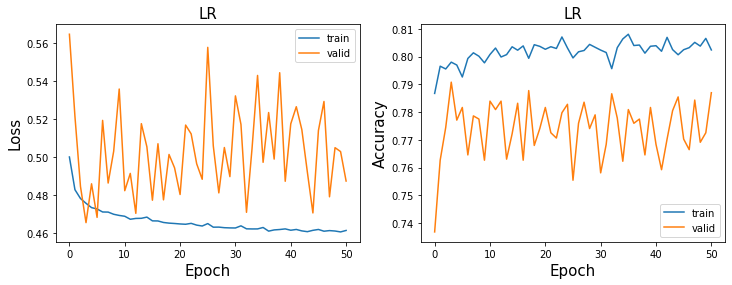

In [37]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

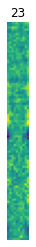

In [38]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [39]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.5483945608139038 accuracy:0.7495599295887342


In [40]:
np.mean(np.concatenate(test_labels))

0.7385182

In [41]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

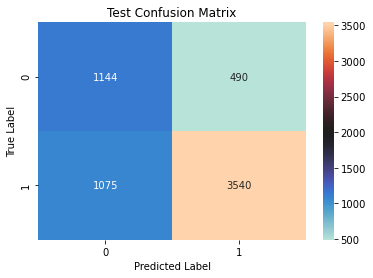

In [42]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:005, time:4747.0, label:1.0
Original data 62 CH


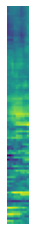

In [43]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [44]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [45]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5013419389724731
Val loss for epoch 0: 0.5420169234275818
Train loss for epoch 1: 0.485338419675827
Val loss for epoch 1: 0.5353020429611206
1
Train loss for epoch 2: 0.4796369969844818
Val loss for epoch 2: 0.5291465520858765
2
Train loss for epoch 3: 0.47772347927093506
Val loss for epoch 3: 0.4769863784313202
3
Train loss for epoch 4: 0.47609713673591614
Val loss for epoch 4: 0.47363775968551636
4
Train loss for epoch 5: 0.4748817980289459
Val loss for epoch 5: 0.49302956461906433
Train loss for epoch 6: 0.4742572009563446
Val loss for epoch 6: 0.46361327171325684
6
Train loss for epoch 7: 0.4742385745048523
Val loss for epoch 7: 0.4936637878417969
Train loss for epoch 8: 0.47364696860313416
Val loss for epoch 8: 0.5009387731552124
Train loss for epoch 9: 0.4734065532684326
Val loss for epoch 9: 0.4850170612335205
Train loss for epoch 10: 0.4727240800857544
Val loss for epoch 10: 0.4682845175266266
Train loss for epoch 11: 0.4723811745643616
Val loss for ep

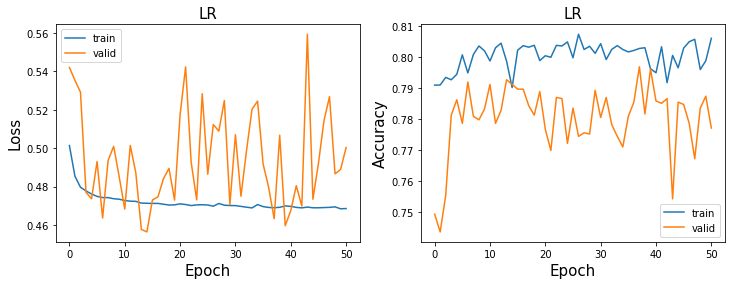

In [46]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [56]:
best_epoch = 14

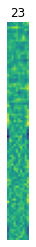

In [57]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [50]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7687711715698242 accuracy:0.4027844455112818


In [51]:
np.mean(np.concatenate(test_labels))

0.7385182

In [52]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

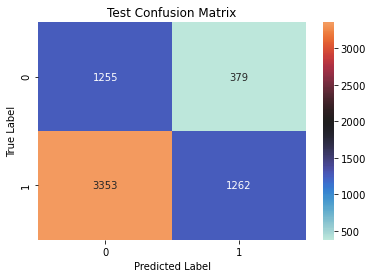

In [53]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:6118.0, label:1.0
Original data 62 CH


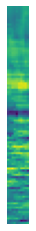

In [54]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_2[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM without regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [15]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5633243322372437
Val loss for epoch 0: 0.6515001654624939
Train loss for epoch 1: 0.5354222655296326
Val loss for epoch 1: 0.6230804324150085
1
Train loss for epoch 2: 0.5250371098518372
Val loss for epoch 2: 0.5986531376838684
2
Train loss for epoch 3: 0.5187399387359619
Val loss for epoch 3: 0.6033577919006348
Train loss for epoch 4: 0.516137421131134
Val loss for epoch 4: 0.6111773252487183
Train loss for epoch 5: 0.5122883915901184
Val loss for epoch 5: 0.5754786133766174
5
Train loss for epoch 6: 0.5103127360343933
Val loss for epoch 6: 0.5845819711685181
Train loss for epoch 7: 0.5089962482452393
Val loss for epoch 7: 0.6389201879501343
Train loss for epoch 8: 0.5068846344947815
Val loss for epoch 8: 0.609408438205719
Train loss for epoch 9: 0.5067763924598694
Val loss for epoch 9: 0.5766943097114563
Train loss for epoch 10: 0.5029414892196655
Val loss for epoch 10: 0.6333111524581909
Train loss for epoch 11: 0.5027903914451599
Val loss for epoch 11: 0.6

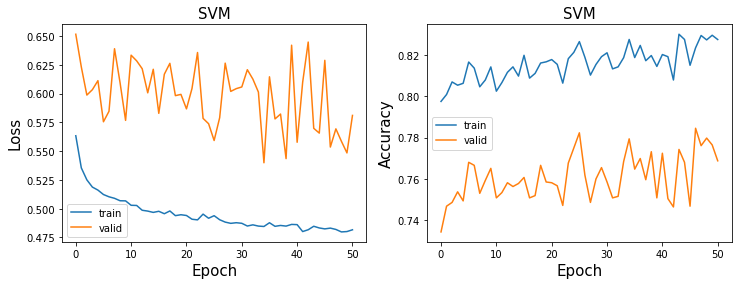

In [16]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 34

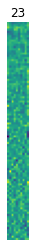

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7474792003631592 accuracy:0.6978461538461539


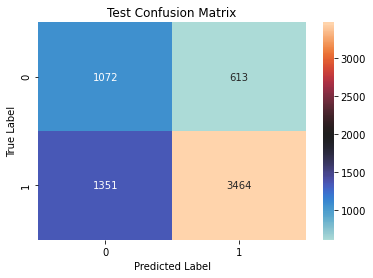

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


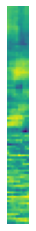

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_3[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

### SVM with finite difference regularization